In [52]:
import numpy as np
from sympy import *
init_printing() 

from sympsi import *
from sympsi.boson import *
from sympsi.pauli import *
from sympsi.expectation import *
from sympsi.operatorordering import *
from sympsi.operator import OperatorFunction
from sympy.solvers.ode import _linear_neq_order1_type1


%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
theta, t, phi, f = symbols("θ, t, φ, f")
eps, Delta, Omega_q, Omega_d = symbols("ε, Δ, ω_q, ω_d",real=True, positive=True)
Hsym = symbols("H")

sx, sy, sz = SigmaX(), SigmaY(), SigmaZ()
sm = sx-I*sy

In [3]:
Hq = Omega_q/2 * sz
arg = Omega_d*t+phi
Hd = f*sx*(exp(I*arg)+exp(-I*arg))/2

H = Hq+Hd

Eq(Hsym, H)

In [4]:
U = exp(I * Omega_d/2 * sz * t); U

In [5]:
H1 = hamiltonian_transformation(U, H)
Eq(Hsym, H1)

In [6]:
H2 = collect(H1.expand(), (sx, sy, sz))
Eq(Hsym, H2)

In [7]:
H2 = simplify(H2.subs(sin(𝑡*Omega_d), (exp(I*𝑡*Omega_d)-exp(-I*𝑡*Omega_d))/2/I))
H2 = simplify(H2.subs(cos(𝑡*Omega_d), (exp(I*𝑡*Omega_d)+exp(-I*𝑡*Omega_d))/2))

H3 = collect(H2.expand(), (f*sx/2, sz, I*f*sy/2))

Eq(Hsym, H3)

In [8]:
#RWA

H3 = collect(H3.expand(), (exp(2*I*𝑡*Omega_d), exp(-2 * I * Omega_d * t), sz))
H4 = drop_terms_containing(H3, [exp(2*I*𝑡*Omega_d), exp(-2 * I * Omega_d * t)])
H4 = collect(H4.expand(), (f*sx, f*sy*I, sz))

Eq(Hsym, H4)

In [9]:
#resonance
H4 = collect((H4.subs(Omega_d, Omega_q)).expand(), (f*sx, f*sy*I))
H = H4
Eq(Hsym, H)

In [10]:
γ, γ_ϕ, L_op = symbols("γ, γ_ϕ, L_op", real=True, positive=True)


ρ_11 = Function("ρ_11")(t)
ρ_12 = Function("ρ_12")(t)
ρ_21 = Function("ρ_21")(t)
ρ_22 = Function("ρ_22")(t) 
ρ = Matrix([[ρ_11,ρ_12],[ρ_21, 1-ρ_11]]) 

σ_z = Matrix([[1,0],[0,-1]]) 
σ_m = Matrix([[0,0],[1,0]]) 
σ_p = Matrix([[0,1],[0,0]])
σ_y = Matrix([[0,-I],[I,0]])
σ_x = σ_m+σ_p


H = H.subs(sx, σ_x)
H = H.subs(sy, σ_y)
H = H.subs(sz, σ_z)


Eq(Hsym, H)

                ⎛   ⅈ⋅φ    -ⅈ⋅φ⎞            ⎛ ⅈ⋅φ    -ⅈ⋅φ⎞
    ⎡0  -ⅈ⎤     ⎜  ℯ      ℯ    ⎟   ⎡0  1⎤   ⎜ℯ      ℯ    ⎟
H = ⎢     ⎥⋅ⅈ⋅f⋅⎜- ──── + ─────⎟ + ⎢    ⎥⋅f⋅⎜──── + ─────⎟
    ⎣ⅈ  0 ⎦     ⎝   4       4  ⎠   ⎣1  0⎦   ⎝ 4       4  ⎠

In [11]:
# Lindblad equation
L_r = sqrt(γ)*σ_m 
L_ϕ = sqrt(γ_ϕ/2)*σ_z

def D(O, ρ):
    return O*ρ*O.adjoint() - ρ*O.adjoint()*O/2 - O.adjoint()*O*ρ/2
def Comm(H, ρ):
    return -I*(H*ρ - ρ*H)

D(L_r, ρ), D(L_ϕ, ρ), Comm(H, ρ)

⎛⎡            -γ⋅ρ₁₂(t) ⎤                                    ⎞
⎜⎢-γ⋅ρ₁₁(t)   ──────────⎥                                    ⎟
⎜⎢                2     ⎥  ⎡     0       -γ_ϕ⋅ρ₁₂(t)⎤  ⎡0  0⎤⎟
⎜⎢                      ⎥, ⎢                        ⎥, ⎢    ⎥⎟
⎜⎢-γ⋅ρ₂₁(t)             ⎥  ⎣-γ_ϕ⋅ρ₂₁(t)       0     ⎦  ⎣0  0⎦⎟
⎜⎢──────────   γ⋅ρ₁₁(t) ⎥                                    ⎟
⎝⎣    2                 ⎦                                    ⎠

In [12]:
L = Comm(H, ρ)+D(L_ϕ, ρ)+D(L_r, ρ)
simplify(L)

⎡                      -(γ + 2⋅γ_ϕ)⋅ρ₁₂(t) ⎤
⎢     -γ⋅ρ₁₁(t)        ────────────────────⎥
⎢                               2          ⎥
⎢                                          ⎥
⎢-(γ + 2⋅γ_ϕ)⋅ρ₂₁(t)                       ⎥
⎢────────────────────        γ⋅ρ₁₁(t)      ⎥
⎣         2                                ⎦

In [13]:
diffs = Matrix([[diff(ρ_11), diff(ρ_12)], [diff(ρ_21), diff(ρ_22)]])
diffs

⎡d           d         ⎤
⎢──(ρ₁₁(t))  ──(ρ₁₂(t))⎥
⎢dt          dt        ⎥
⎢                      ⎥
⎢d           d         ⎥
⎢──(ρ₂₁(t))  ──(ρ₂₂(t))⎥
⎣dt          dt        ⎦

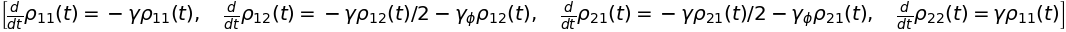

In [14]:
odes = [Eq(diff, right) for diff, right in zip(list(diffs), list(L))][:4]
odes

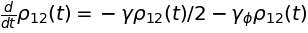

In [16]:
odes[0]

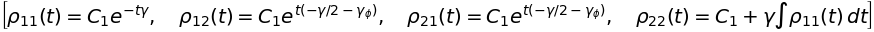

In [55]:
ans0 = dsolve(odes[0]) 
ans1 = dsolve(odes[1]) 
ans2 = dsolve(odes[2]) 
ans3 = dsolve(odes[3]) 

ans=[ans0, ans1, ans2, ans3]

ans